In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("africa_recession.csv")

In [3]:
df.head()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,...,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
0,28.849621,6.914298,0.239667,1.547767,99010.171880,131991.375000,426543.343800,0.009374,0.648979,0.626111,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
1,45.728313,13.623806,0.297929,2.086037,316862.656300,374842.343800,804602.250000,0.019658,0.719390,0.657543,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
2,33.262043,13.323813,0.400571,1.498783,29762.876950,36584.992190,67072.593750,0.001670,0.308652,0.292607,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
3,8.025703,3.869000,0.482076,1.356151,6488.692871,7006.969727,5790.396973,0.000184,0.205865,0.234643,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
4,1.061468,0.243000,0.228928,1.676330,7620.187500,8419.264648,16907.236330,0.000431,0.959765,0.993985,...,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pop                     486 non-null    float64
 1   emp                     486 non-null    float64
 2   emp_to_pop_ratio        486 non-null    float64
 3   hc                      486 non-null    float64
 4   ccon                    486 non-null    float64
 5   cda                     486 non-null    float64
 6   cn                      486 non-null    float64
 7   ck                      486 non-null    float64
 8   ctfp                    486 non-null    float64
 9   cwtfp                   486 non-null    float64
 10  rconna                  486 non-null    float64
 11  rdana                   486 non-null    float64
 12  rnna                    486 non-null    float64
 13  rkna                    486 non-null    float64
 14  rtfpna                  486 non-null    fl

In [5]:
df.isna().sum()

pop                       0
emp                       0
emp_to_pop_ratio          0
hc                        0
ccon                      0
cda                       0
cn                        0
ck                        0
ctfp                      0
cwtfp                     0
rconna                    0
rdana                     0
rnna                      0
rkna                      0
rtfpna                    0
rwtfpna                   0
labsh                     0
irr                       0
delta                     0
xr                        0
pl_con                    0
pl_da                     0
pl_gdpo                   0
csh_c                     0
csh_i                     0
csh_g                     0
csh_x                     0
csh_m                     0
csh_r                     0
pl_c                      0
pl_i                      0
pl_g                      0
pl_x                      0
pl_m                      0
pl_n                      0
total               

In [6]:
from pprint import pprint

# print all the columns
pprint(df.columns)

Index(['pop', 'emp', 'emp_to_pop_ratio', 'hc', 'ccon', 'cda', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna', 'rwtfpna',
       'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo', 'csh_c',
       'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i', 'pl_g',
       'pl_x', 'pl_m', 'pl_n', 'total', 'excl_energy', 'energy',
       'metals_minerals', 'forestry', 'agriculture', 'fish', 'total_change',
       'excl_energy_change', 'energy_change', 'metals_minerals_change',
       'forestry_change', 'agriculture_change', 'fish_change', 'growthbucket'],
      dtype='object')


In [7]:
# Select the appropriate features using sklearn
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(["growthbucket"], axis=1).values
y = df["growthbucket"].values

X = SelectKBest(f_classif, k=5).fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Show the columns that were selected without df
selected = SelectKBest(f_classif, k=5).fit(X, y)

# Get the indices of the columns that were selected
idxs = selected.get_support(indices=True)

# Get the names of the columns that were selected
cols = df.columns[idxs]

# Print the names of the columns that were selected
print(cols)

Index(['pop', 'emp', 'emp_to_pop_ratio', 'hc', 'ccon'], dtype='object')


In [11]:
# Build the model
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# Predict the test set
y_pred = model.predict(X_test)

# Print the accuracy
print(f"Accuracy: {accuracy_score(y_pred, y_test)}")

Accuracy: 0.9285714285714286


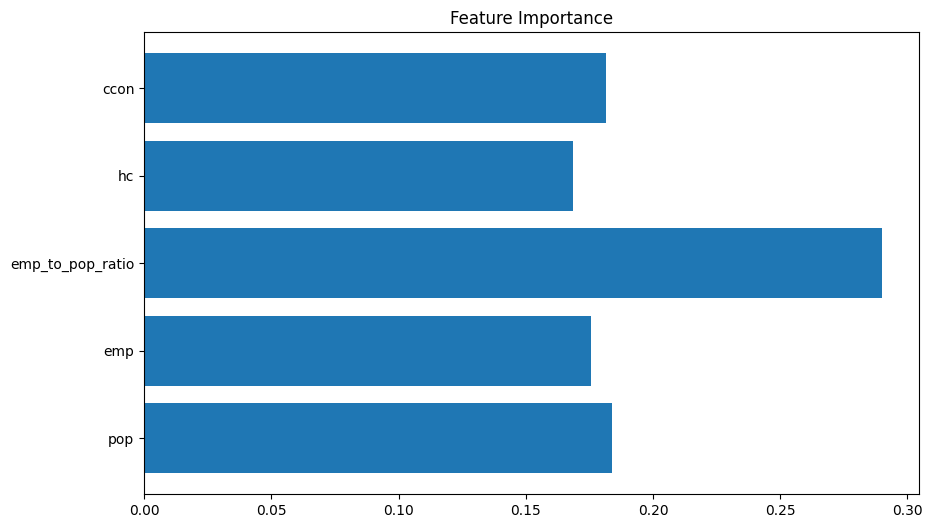

In [16]:
# Show the accuracy of the model in graph form
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(cols, model.feature_importances_)
plt.title("Feature Importance")
plt.show()